## IMDb Datasets Analysis

* **Collaborators:** Mingrui Zhang 20985422, Yanhao Lin 20481552

## Set up runtime and download datasets

In [1]:
# Java, Spark install
!apt-get update -qq > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.3/spark-3.2.3-bin-hadoop2.7.tgz
!tar xf spark-3.2.3-bin-hadoop2.7.tgz
!pip install -q findspark

# Download IMDb Datasets and unzip it as tsv files
!wget -q https://datasets.imdbws.com/name.basics.tsv.gz
!wget -q https://datasets.imdbws.com/title.akas.tsv.gz
!wget -q https://datasets.imdbws.com/title.basics.tsv.gz
!wget -q https://datasets.imdbws.com/title.crew.tsv.gz
!wget -q https://datasets.imdbws.com/title.episode.tsv.gz
!wget -q https://datasets.imdbws.com/title.principals.tsv.gz
!wget -q https://datasets.imdbws.com/title.ratings.tsv.gz

# nameBasics
!gzip -d name.basics.tsv.gz
!mv name.basics.tsv nameBasics.tsv

# titleAkas
!gzip -d title.akas.tsv.gz
!mv title.akas.tsv titleAkas.tsv

# titleBasics
!gzip -d title.basics.tsv.gz
!mv title.basics.tsv titleBasics.tsv

# titleCrew
!gzip -d title.crew.tsv.gz
!mv title.crew.tsv titleCrew.tsv

# titleEpisode
!gzip -d title.episode.tsv.gz
!mv title.episode.tsv titleEpisode.tsv

# titlePrincipals
!gzip -d title.principals.tsv.gz
!mv title.principals.tsv titlePrincipals.tsv

# titleRatings
!gzip -d title.ratings.tsv.gz
!mv title.ratings.tsv titleRatings.tsv

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop2.7"

import findspark
findspark.init()

from pyspark.sql import SparkSession
import random

spark = SparkSession.builder.appName("YourTest").master("local[2]").config('spark.ui.port', random.randrange(4000,5000)).getOrCreate()

## Preprocessing datasets

In [3]:
# nameBasics
nameBasicRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("nameBasics.tsv").cache()
nameBasicRaw.createOrReplaceTempView("nameBasics")

# titleAkas
titleAkasRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleAkas.tsv").cache()
titleAkasRaw.createOrReplaceTempView("titleAkas")

# titleBasics
titleBasicsRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleBasics.tsv").cache()
titleBasicsRaw.createOrReplaceTempView("titleBasics")

# titleCrew
titleCrewRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleCrew.tsv").cache()
titleCrewRaw.createOrReplaceTempView("titleCrew")

# titleEpisode
titleEpisodeRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleEpisode.tsv").cache()
titleEpisodeRaw.createOrReplaceTempView("titleEpisode")

# titlePrincipals
titlePrincipalsRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titlePrincipals.tsv").cache()
titlePrincipalsRaw.createOrReplaceTempView("titlePrincipals")

# titleRatings
titleRatingsRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleRatings.tsv").cache()
titleRatingsRaw.createOrReplaceTempView("titleRatings")

> To see the data in table format, run the following code.

In [4]:
print("nameBasicRaw")
nameBasicRaw.show()
print(nameBasicRaw.dtypes)
print("\n")

print("titleAkasRaw")
titleAkasRaw.show()
print(titleAkasRaw.dtypes)
print("\n")

print("titleBasicsRaw")
titleBasicsRaw.show()
print(titleBasicsRaw.dtypes)
print("\n")

print("titleCrewRaw")
titleCrewRaw.show()
print(titleCrewRaw.dtypes)
print("\n")

print("titleEpisodeRaw")
titleEpisodeRaw.show()
print(titleEpisodeRaw.dtypes)
print("\n")

print("titlePrincipalsRaw")
titlePrincipalsRaw.show()
print(titlePrincipalsRaw.dtypes)
print("\n")

print("titleRatingsRaw")
titleRatingsRaw.show()
print(titleRatingsRaw.dtypes)
print("\n")

nameBasicRaw
+---------+-------------------+---------+---------+--------------------+--------------------+
|   nconst|        primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+-------------------+---------+---------+--------------------+--------------------+
|nm0000001|       Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0072308,tt00531...|
|nm0000002|      Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0117057,tt00383...|
|nm0000003|    Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0049189,tt00564...|
|nm0000004|       John Belushi|     1949|     1982|actor,soundtrack,...|tt0077975,tt00787...|
|nm0000005|     Ingmar Bergman|     1918|     2007|writer,director,a...|tt0083922,tt00509...|
|nm0000006|     Ingrid Bergman|     1915|     1982|actress,soundtrac...|tt0034583,tt00381...|
|nm0000007|    Humphrey Bogart|     1899|     1957|actor,soundtrack,...|tt0043265,tt00425...|
|nm0000008|      Marlon Brando|     1924|     2

## Movie Production Decision Maker

The program helps you find the most suitable crews and cast to produce a movie if your goal is to achieve the highest possible rating. 

- Input:
1. Genres
2. IsAdult
3. Maximum Age
4. Vote/Rate Ratio

> Possible Selection of Genres
- Action, Adventure, Animation
- Biography
- Comedy, Crime	
- Documentary, Drama
- Family, Fantasy
- History, Horror
- Music, Musical, Mystery
- Romance
- Sci-Fi, Short, Sport, Superhero
- Thriller
- War, Western
- "*" means all

> The larger the Vote/Rate Ratio is, the more popular and better ratings the samples are. (The value is between 0 - 1) Note that the maximum amount of votes currently is around 2,670,818. This value should be considered carefully for better results.

- Output:
1. Possible Crews
2. Possible Actors

Input movie genres (q to quit): crime
Input is adult option: false
Input max age (int): 80
Input vote rate ratio (float): 0.1
Possible actor



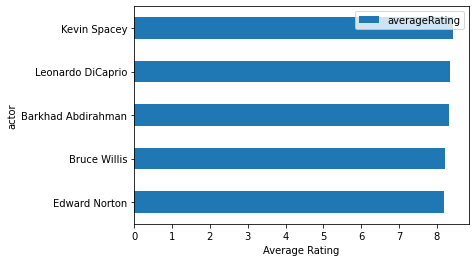

Possible actress



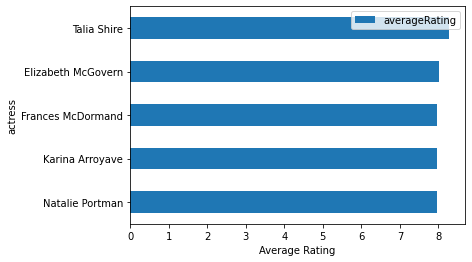

Possible cinematographer



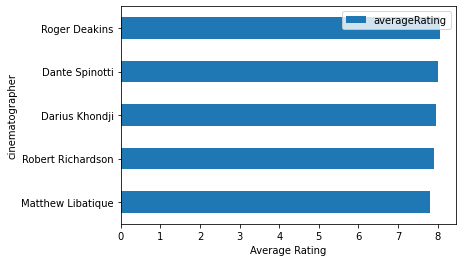

Possible composer



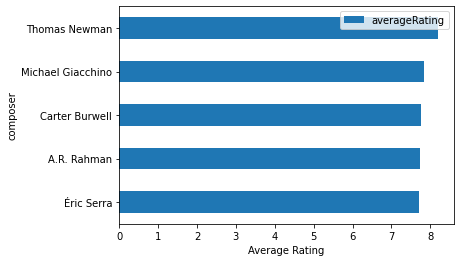

Possible director



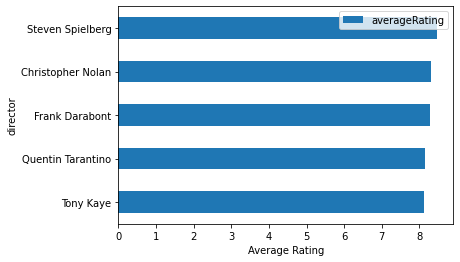

Possible editor



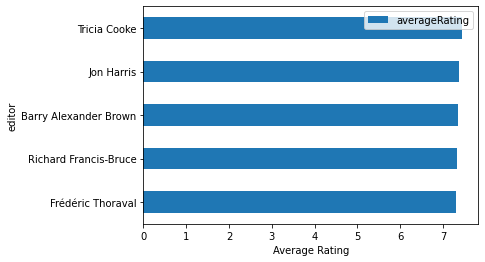

Possible producer



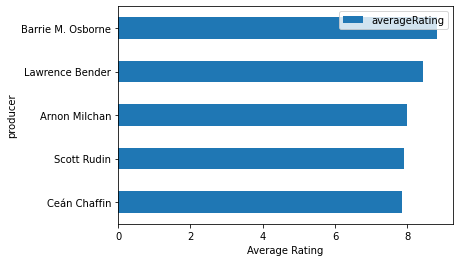

Possible production_designer



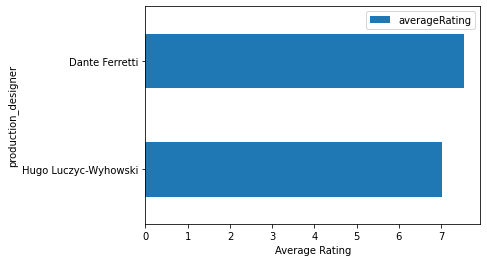

Possible writer



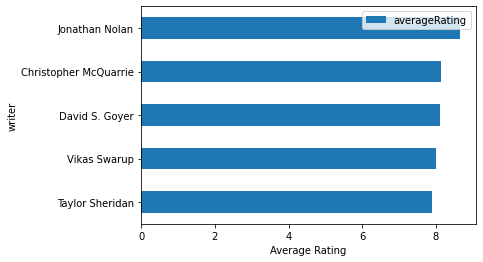

Input movie genres (q to quit): q


In [7]:
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import datetime

genresString = "action,adventure,animation,biography,comedy,crime,documentary,\
         drama,family,fantasy,history,horror,music,musical,mystery,romance,\
         sci-fi,short,sport,superhero,thriller,war,western"

def suggestMovieProduction(genresArrayString, isAdult, maxAge, voteRateRatio):
  # Make sure that we only deal with movie
  titleBasicsMovie = titleBasicsRaw.filter(titleBasicsRaw.titleType == "movie")

  # Process rateVoteRatio first
  titleRatingsWithVRR = titleRatingsRaw.withColumn("averageRating", titleRatingsRaw["averageRating"].cast("float"))
  titleRatingsWithVRR = titleRatingsWithVRR.withColumn("numVotes", titleRatingsWithVRR["numVotes"].cast("float"))
  titleRatingsWithVRR = titleRatingsWithVRR.withColumn("voteRateRatio", titleRatingsWithVRR.numVotes * titleRatingsWithVRR.averageRating)
  maxVRR = titleRatingsWithVRR.orderBy("voteRateRatio", ascending=False).head()[3]
  VRRfilter = maxVRR * voteRateRatio

  # Join titleBasics and titleRatingsWithVRR
  titleBasicsMovieWithRating = titleRatingsWithVRR.join(titleBasicsMovie, titleRatingsWithVRR.tconst == titleBasicsMovie.tconst, "inner")\
                           .drop(titleRatingsWithVRR.tconst)

  # Filter use VRRfilter
  titleRatingsWithVRRBestRatings = titleBasicsMovieWithRating.filter(titleBasicsMovieWithRating.voteRateRatio >= VRRfilter)

  # Now start to filter genres and isAdult 
  # We first preprocess the data, we conert the genres column string to lowercase and split is into a array store
  # it into a seqarate column to compare with the genresArrayString. genresArrayString is also added and splitted
  # as a new column in the table. array_intersect will check whether they have common items. If they do have common items
  # we keep them. (filter(size(array_intersect(col("genresCompareI"), col("genresCompareO"))) >= 1)
  filterGenres = titleRatingsWithVRRBestRatings.withColumn("genresCompareO", lower(col("genres")))
  filterGenres = filterGenres.withColumn("genresCompareO", split(col("genresCompareO"), ","))
  filterGenres = filterGenres.withColumn('genresCompareI', lit(genresArrayString))
  filterGenres = filterGenres.withColumn('genresCompareI', split(col("genresCompareI"), ","))\
                 .filter(size(array_intersect(col("genresCompareI"), col("genresCompareO"))) >= 1)
  filterGenres = filterGenres.filter(titleRatingsWithVRRBestRatings.isAdult == ('1' if isAdult else '0'))
  filterGenres = filterGenres.drop("averageRating", "numVotes", "voteRateRatio", "titleType", "isAdult",\
                    "startYear", "endYear", "runtimeMinutes", "genres", "genresCompareO", 'genresCompareI')
  
  # Get the principals crew and join nameBasicRaw
  principalsCrews = filterGenres.join(titlePrincipalsRaw, titlePrincipalsRaw.tconst == filterGenres.tconst, "inner")\
                  .drop(titlePrincipalsRaw.tconst).drop(titlePrincipalsRaw.ordering).drop(titlePrincipalsRaw.characters)
  principalsCrews = principalsCrews.join(nameBasicRaw, titlePrincipalsRaw.nconst == nameBasicRaw.nconst, "inner")\
                    .drop(principalsCrews.tconst).drop(nameBasicRaw.nconst)

  # Filter out the people that are passed away or older than maxAge
  # Cache the result for future use
  thisYear = datetime.datetime.now().year
  birthYearToFilter = thisYear - maxAge
  principalsCrewsCache = principalsCrews.filter(principalsCrews.deathYear == "\\N").filter(principalsCrews.birthYear >= birthYearToFilter).cache()
  candidates = principalsCrewsCache

  # Now we use knownForTitles to calculate the overall average ratings
  # This is achieved by using split to firstly convert the string into array
  # and explode it into multiple rows and each row will have a title within
  # the knownForTitles
  candidates = candidates.withColumn("titlesArray", split(candidates.knownForTitles, ","))
  candidates = candidates.withColumn("titleSep", explode(candidates.titlesArray))
  candidates = candidates.drop(candidates.knownForTitles).drop(candidates.titlesArray)

  # Join titleRatingsRaw to get the ratings for each title
  candidates = candidates.join(titleRatingsRaw, candidates.titleSep == titleRatingsRaw.tconst, "inner")\
               .drop(candidates.titleSep).drop(titleRatingsRaw.numVotes)
  
  # Use groupBy and avg to find the average ratings
  # Inorder to use avg, the data type needs to be float, use cast
  candidates = candidates.withColumn("averageRating", candidates["averageRating"].cast("float"))
  candidatesAvgRatings = candidates.groupBy("primaryName").avg("averageRating")
  candidatesAvgRatings = candidatesAvgRatings.withColumnRenamed("avg(averageRating)", "averageRating")

  # Now join the principalsCrewsCache to get the pre-final table
  principalsCrewsPreFinal = principalsCrewsCache.join(candidatesAvgRatings, principalsCrewsCache.primaryName == candidatesAvgRatings.primaryName, "inner")\
                          .drop(principalsCrewsCache.primaryName)\
                          .drop("primaryTitle", "originalTitle", "nconst", \
                             "job", "birthYear", "deathYear", "primaryProfession", "knownForTitles").distinct()

  # For all the principals crews collected, we find all job categories and generate its data frame
  listCategory = [list(x.asDict().values())[0] for x in principalsCrewsPreFinal.select("category").distinct().collect()]
  listCategory.sort()
  resultArray = [principalsCrewsPreFinal.where(principalsCrewsPreFinal.category == x) for x in listCategory]
  
  # We will take the first 5 as the result crew for each job category by ranking the averageRating
  if len(resultArray) == 0:
    print("Sorry, no recommendations are available under these conditions.")

  counter = 0
  for result in resultArray:
    print("Possible " + listCategory[counter] + "\n")

    # Double orderBy to make sure that the graph is drawn correctly
    result = result.orderBy("averageRating", ascending=False).limit(5).orderBy("averageRating")

    # Draw the diagram
    pdDF = result.toPandas()
    pdDF['averageRating'] = pdDF['averageRating'].astype(float)
    pdDF.plot.barh(x='primaryName', y='averageRating')

    # # Add labels to the x and y axes
    plt.xlabel("Average Rating")
    plt.ylabel(listCategory[counter])

    counter = counter + 1
    # Show the plot
    plt.show()

###################################################################################################################
#  the user interface
###################################################################################################################

while True:
  inputVoteRateRatio = None
  inputIsAdult = None
  inputGenreOriginal = None
  inputMaxage = None
  quitP = False

  # Genres
  continueG = True
  while continueG:
    inputGenreOriginal = input("Input movie genres (q to quit): ")
    
    # Quit mechanism and *
    if inputGenreOriginal == 'q':
      quitP = True
      break
    elif inputGenreOriginal == '*':
      inputGenreOriginal = genresString
      break
    
    inputGenreSp = inputGenreOriginal.split(',')

    toContinue = False
    for item in inputGenreSp:
      item = item.lower()
      if not item in genresString:
        print("Genres invalid! Please input a valid genre array separated by comma with no space.")
        toContinue = True
        break
    continueG = toContinue
  
  # Quit mechanism
  if quitP:
    break;

  # Is adult
  while True:
    inputIsAdult = input("Input is adult option: ")
    if inputIsAdult.lower() != "true" and inputIsAdult.lower() != "false":
      print("Invalid! Please input true or false.")
      continue
    break

  # Max age
  while True:
    try:
      inputMaxage = int(input("Input max age (int): "))
      break
    except:
      print("That's not a valid int!")

  # Vote rate ratio
  while True:
    try:
      inputVoteRateRatio = float(input("Input vote rate ratio (float): "))
      break
    except:
      print("That's not a valid float!")

  # Main function
  suggestMovieProduction(inputGenreOriginal, True if inputIsAdult.lower() == 'true' else False, inputMaxage, inputVoteRateRatio)

## Movie Finder

The program helps you find the movie that meets your all your interests the best. 

<em>Note: This section is not part of our proposal.This is more for the purpose to show:
1. Solving a similar but logically opposite problem: this is targeting the audience, and we try to collect as much information as possible to generate one concrete output.
2. This program is taking the RDD appraoch instead of DataFrame as we want to provide examples with both techniques for other people.
The program does not always work due to the resource constraints of Colab despite the program is logically correct. (see inline comments around the end of `function suggestMovie(userInfo)` for details) 
</em>

- Input:
1. Preferred Actor & How much does the matching the actor matter.
2. Preferred Actress & How much does the matching the actress matter.
3. Preferred Director & How much does the matching the director matter.
4. Preferred Genre & how much the matching matters.
5. How much does the movie's rating matter.
6. How much does the Release Year matter.   
(filling any filed with "*" means "all is acceptable", and will make its correspondent priority (how much it matters) to 0.)

- Output:
The suggested movie to watch.

In [9]:
from pyspark.sql.functions import *


def suggestMovie(userInfo):
  titleBasicsMovie = titleBasicsRaw.filter(titleBasicsRaw.titleType == "movie")
  
  cols = ("numVotes", "titleType", "isAdult", "endYear", "runtimeMinutes")
  titleBasicsMovieWithRating = titleRatingsRaw.join(titleBasicsMovie, titleRatingsRaw.tconst == titleBasicsMovie.tconst, "inner").drop(titleRatingsRaw.tconst).drop(*cols).withColumn("genres", lower(col("genres")))
  principalsCrews = titleBasicsMovieWithRating.join(titlePrincipalsRaw, titlePrincipalsRaw.tconst == titleBasicsMovieWithRating.tconst, "inner").drop(titlePrincipalsRaw.tconst).drop(titlePrincipalsRaw.ordering).drop(titlePrincipalsRaw.characters)
  principalsCrews = principalsCrews.join(nameBasicRaw, titlePrincipalsRaw.nconst == nameBasicRaw.nconst, "inner").drop(principalsCrews.tconst).drop(nameBasicRaw.nconst)
  finalRaw = principalsCrews.select("primaryTitle", "genres", "primaryName", "category", 'startYear', "averageRating")
  
  # At this point, the table contains only relative columns. We convert it into one rdd for computation.
  rdd = finalRaw.rdd.map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5]))
  titleBasicsMovieWithRating.unpersist()
  principalsCrews.unpersist()
  finalRaw.unpersist()
  rdd = rdd.map(lambda x: (x[0], x[1], x[2], x[3],int(x[4]), float(x[5])))
  ratingFactor = userInfo['rating'][1]
  finalRdd = rdd.map(lambda x: (x[0], x[5]*ratingFactor))
  
  # Build the actor rdd according to heuristics, the tuple look like (movie name, weighted actor matching)
  if userInfo['actor'][1] != 0:
    actor = userInfo['actor'][0]
    factor = userInfo['actor'][1]
    actorRdd = rdd.map(lambda x: (x[0], factor) if (x[2] == actor and x[3] == 'actor') else (x[0], 0))
    finalRdd = finalRdd.union(actorRdd)
  
  # Build the actress rdd according to heuristics, the tuple look like (movie name, weighted actress matching)
  if userInfo['actress'][1] != 0:
    actress = userInfo['actress'][0]
    factor = userInfo['actress'][1]
    actressRdd = rdd.map(lambda x: (x[0], factor) if (x[2] == actress and x[3] == 'actress') else (x[0], 0))
    finalRdd = finalRdd.union(actressRdd)
  
  # Build the director rdd according to heuristics, the tuple look like (movie name, weighted director matching)
  if userInfo['director'][1] != 0:
    director = userInfo['director'][0]
    factor = userInfo['director'][1]
    directorRdd = rdd.map(lambda x: (x[0], factor) if (x[2] == director and x[3] == 'director') else (x[0], 0))
    finalRdd = finalRdd.union(directorRdd)

  # Build the genre rdd according to heuristics, the tuple look like (movie name, weighted genre matching)
  if userInfo['genre'][1] != 0:
    genre = userInfo['genre'][0]
    factor = userInfo['genre'][1]
    genreRdd = rdd.map(lambda x: (x[0], factor) if (x[2].find(genre) != -1) else (x[0], 0))
    finalRdd = finalRdd.union(genreRdd)
  
  # Build the year rdd according to heuristics, the tuple look like (movie name, weighted year matching - depending on how close it is)
  if userInfo['year'][1] != 0:
    year = userInfo['year'][0]
    factor = userInfo['year'][1]
    yearRdd = rdd.map(lambda x: (x[0], (100-abs(x[4]-year))/100*factor))
    finalRdd = finalRdd.union(yearRdd)

  # this line is guaranteed to work, which shows the program is logically correct.
  print(finalRdd.take(1))
  # this line occasionally works, and we believe the issue is the resource constraints on Colab. The .tsv files are measured in GBs, without having an actual "Distributed Platform", it does explode.
  print(finalRdd.reduceByKey(lambda x, y: x+y).top(1, lambda x: x[1]))

###################################################################################################################
#  the user interface
###################################################################################################################

userInfo = {'actor': ('', 0), 'actress': ('', 0), 'director': ('', 0), 'rating': ('', 0), 'genre': ('', 0), 'year': (2000, 0)}
# userInfo = {'actor': ('Chris Evans', 0.5), 'actress': ('Elizabeth Olsen', 1.0), 'director': ('*', 0), 'rating': ('', 1.0), 'genre': ('*', 0), 'year': (2019, 0.3)}
while True:
  print("Entering * in a field means any value is fine (no preferred value)")
  actor = input("Preferred Actor: ")
  actorFactor = 0
  if actor != '*':
    actorFactor = float(input("Actor Priority (float 0-10): "))
  userInfo['actor'] = (actor, actorFactor/10.0)

  actress = input("Preferred Actress: ")
  actressFactor = 0
  if actress != '*':
    actressFactor = float(input("Actress Priority (float 0-10): "))
  userInfo['actress'] = (actress, actressFactor/10.0)
  director = input("Preferred Director: ")
  directorFactor = 0
  if director != '*':
    directorFactor = float(input("Director Priority (float 0-10): "))
  userInfo['director'] = (director, directorFactor/10.0)

  genre = input("Preferred Genre: ")
  genreFactor = 0
  if genre != '*':
    genreFactor = float(input("Genre Priority (float 0-10): "))
  userInfo['genre'] = (genre, genreFactor/10.0)

  year = input("Preferred Year: ")
  yearFactor = 0
  if year != '*':
    yearFactor = float(input("Year Priority (float 0-10): "))
  userInfo['year'] = (year, yearFactor/10.0)

  ratingFactor = float(input("How much does rating matter (float 0-10): "))
  userInfo['rating'] = ('', ratingFactor/10.0)

  # Main function
  suggestMovie(userInfo)

  quit = input("Do you want to quit (Y/n)? ")
  if quit == 'Y':
    break

Entering * in a field means any value is fine (no preferred value)
Preferred Actor: Jack Nicholson
Actor Priority (float 0-10): 5
Preferred Actress: *
Preferred Director: Jack Nicholson
Director Priority (float 0-10): 10
Preferred Genre: *
Preferred Year: 1978
Year Priority (float 0-10): 10
How much does rating matter (float 0-10): 3
[('Belushi', 2.16)]
Do you want to quit (Y/n)? Y
